In [14]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv(r"C:\Users\sanjeev krishna\OneDrive\Documents\IEA-EV-dataEV salesHistoricalCars.csv")
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000


In [4]:
to_drop = ['category','mode']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,region,parameter,powertrain,year,unit,value
0,Australia,EV stock,BEV,2011,Vehicles,49.00000
1,Australia,EV stock share,EV,2011,percent,0.00046
2,Australia,EV sales share,EV,2011,percent,0.00650
3,Australia,EV sales,BEV,2011,Vehicles,49.00000
4,Australia,EV sales,BEV,2012,Vehicles,170.00000


In [5]:
filt=(df['parameter']=='EV sales')
df[filt]

,region,parameter,powertrain,year,unit,value
3,Australia,EV sales,BEV,2011,Vehicles,49.0
4,Australia,EV sales,BEV,2012,Vehicles,170.0
9,Australia,EV sales,PHEV,2012,Vehicles,80.0
10,Australia,EV sales,PHEV,2013,Vehicles,100.0
15,Australia,EV sales,BEV,2013,Vehicles,190.0
...,...,...,...,...,...,...
2754,World,EV sales,BEV,2020,Vehicles,2000000.0
2760,World,EV sales,BEV,2021,Vehicles,4600000.0
2764,World,EV sales,PHEV,2021,Vehicles,1900000.0
2769,World,EV sales,PHEV,2022,Vehicles,2900000.0


In [6]:
df_filtered = df[filt].drop(['parameter', 'unit'], axis=1)


In [7]:
df_filtered.tail()


,region,powertrain,year,value
2754,World,BEV,2020,2000000.0
2760,World,BEV,2021,4600000.0
2764,World,PHEV,2021,1900000.0
2769,World,PHEV,2022,2900000.0
2773,World,BEV,2022,7300000.0


In [8]:
df_filtered.head()


,region,powertrain,year,value
3,Australia,BEV,2011,49.0
4,Australia,BEV,2012,170.0
9,Australia,PHEV,2012,80.0
10,Australia,PHEV,2013,100.0
15,Australia,BEV,2013,190.0


<Axes: xlabel='powertrain', ylabel='region-year'>

<Figure size 1000x1000 with 0 Axes>

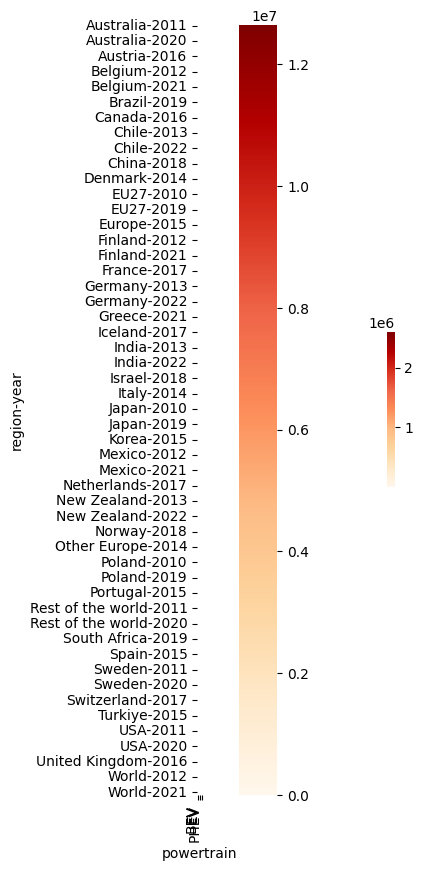

In [9]:
plt.figure(figsize=(10,10))
prediction_EV_sales = df.pivot_table(index="region", columns="powertrain", values="value", aggfunc="mean")
plt.figure(figsize=(10, 10))
g = sns.heatmap(
    prediction_EV_sales,
    square=True,
    cbar_kws={'fraction': 0.01},
    cmap='OrRd',
    linewidth=1
)
g.set_xticklabels(prediction_EV_sales.columns, rotation=45, horizontalalignment='right')
g.set_yticklabels(prediction_EV_sales.index, rotation=45, horizontalalignment='right')
df_heatmap = df.pivot_table(index=["region", "year"], columns="powertrain", values="value", aggfunc="mean")
sns.heatmap(df_heatmap, cmap='OrRd', linewidth=1)


C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanjeev krishna\AppData\Local\Programs\Python\P

Accuracy: 0.8458119904768775
Feature Log Probabilities:
region: 0.008654135748452026
powertrain: 0.000231812501037524
year: 0.9911140517505113
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.99      0.99       829
           2       0.00      0.00      0.00         4

    accuracy                           0.98       834
   macro avg       0.33      0.33      0.33       834
weighted avg       0.99      0.98      0.98       834



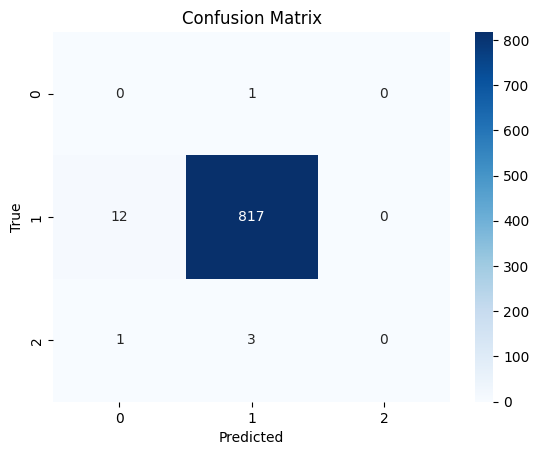

In [10]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_filtered['value_category'] = pd.cut(df_filtered['value'], bins=3, labels=['low', 'medium', 'high'])
label_encoder = LabelEncoder()
df_filtered['region'] = label_encoder.fit_transform(df_filtered['region'])
df_filtered['powertrain'] = label_encoder.fit_transform(df_filtered['powertrain'])
df_filtered['value_category'] = label_encoder.fit_transform(df_filtered['value_category'])
X = df_filtered[['region', 'powertrain', 'year']]
y = df_filtered['value_category']
model = MultinomialNB()
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Accuracy: {cv_scores.mean()}')
model.fit(X, y)
feature_log_prob = model.feature_log_prob_
print('Feature Log Probabilities:')
for i, feature in enumerate(X.columns):
    print(f'{feature}: {np.exp(feature_log_prob[1][i])}')
y_pred = model.predict(X)
print('Classification Report:')
print(classification_report(y, y_pred))
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



C:\Users\sanjeev krishna\AppData\Local\Temp\ipykernel_30932\3451351116.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['region'] = label_encoder.fit_transform(X['region'])
C:\Users\sanjeev krishna\AppData\Local\Temp\ipykernel_30932\3451351116.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['powertrain'] = label_encoder.fit_transform(X['powertrain'])
C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default valu

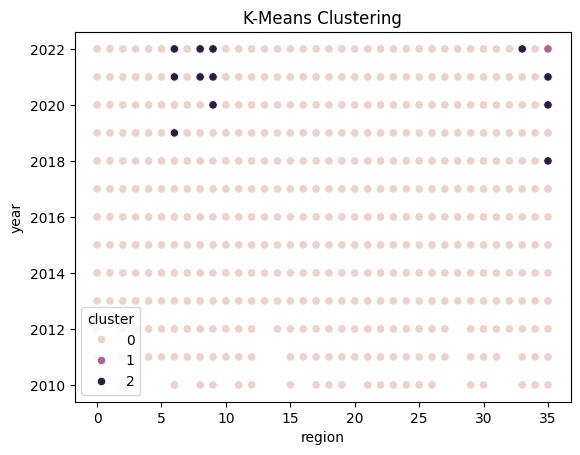

Silhouette Score: 0.05827877312831487


In [11]:
#kmeans
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
X = df_filtered[['region', 'powertrain', 'year', 'value']]
label_encoder = LabelEncoder()
X['region'] = label_encoder.fit_transform(X['region'])
X['powertrain'] = label_encoder.fit_transform(X['powertrain'])
kmeans = KMeans(n_clusters=3, random_state=42)
X['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(x='region', y='year', hue='cluster', data=X)
plt.title('K-Means Clustering')
plt.show()
silhouette_avg = silhouette_score(X[['region', 'powertrain', 'year']], X['cluster'])
print(f'Silhouette Score: {silhouette_avg}')


C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


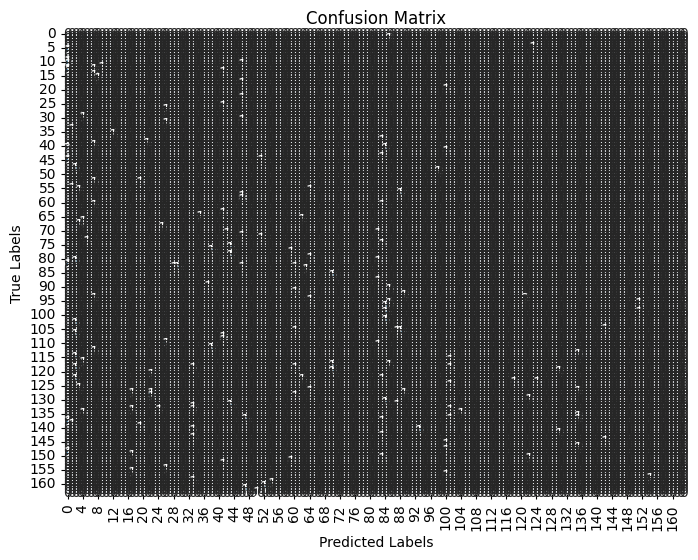

Accuracy: 0.60%
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         1
        21.0       0.00      0.00      0.00         2
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         2
        25.0       0.00      0.00      0.00         1
        28.0       0.00      0.00      0.00         1
        30.0       0.00      0.00      0.0

C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior

In [20]:
#knn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
df_filtered['region'] = label_encoder.fit_transform(df_filtered['region'])
df_filtered['powertrain'] = label_encoder.fit_transform(df_filtered['powertrain'])
X = df_filtered[['region', 'powertrain', 'year']]
y = df_filtered['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
    'n_neighbors': [5, 10, 15, 20],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]  
}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
accuracy_percentage = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Best Parameters:', grid_search.best_params_)


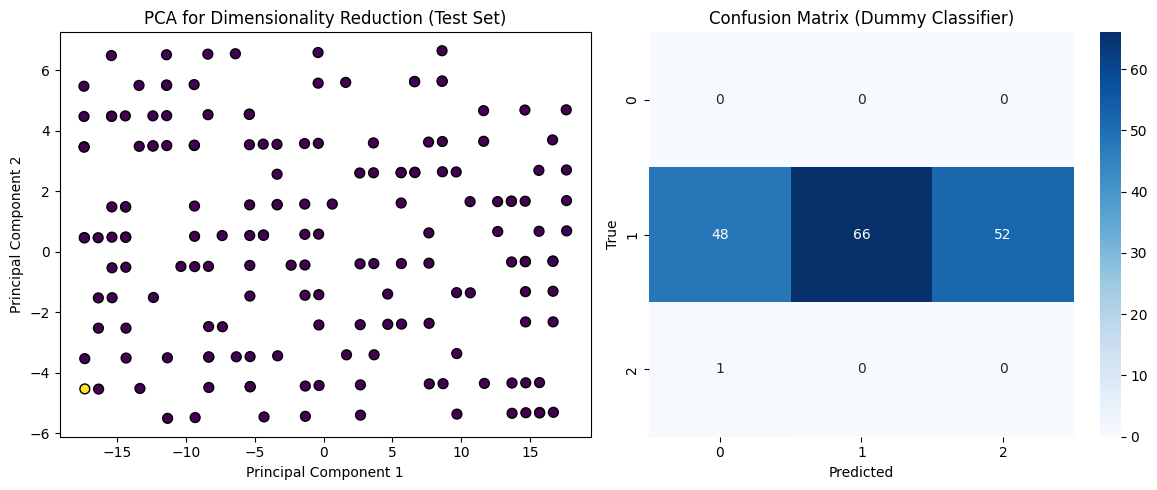

Dummy Classifier Accuracy: 0.39520958083832336


In [11]:
#dimensationlity reduction
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered['value_category'] = pd.cut(df_filtered['value'], bins=3, labels=['low', 'medium', 'high'])
label_encoder = LabelEncoder()
df_filtered['region'] = label_encoder.fit_transform(df_filtered['region'])
df_filtered['powertrain'] = label_encoder.fit_transform(df_filtered['powertrain'])
df_filtered['value_category'] = label_encoder.fit_transform(df_filtered['value_category'])
X = df_filtered[['region', 'powertrain', 'year']]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, df_filtered['value_category'], test_size=0.2, random_state=42)
dummy_clf = DummyClassifier(strategy='uniform')
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for Dimensionality Reduction (Test Set)')
plt.subplot(1, 2, 2)
conf_matrix_dummy = confusion_matrix(y_test, y_pred_dummy)
sns.heatmap(conf_matrix_dummy, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Dummy Classifier)')
plt.tight_layout()
plt.show()
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print(f' Classifier Accuracy: {accuracy_dummy}')


Accuracy with SVM predictions: 0.9940119760479041

Classification report with SVM predictions:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       166
           2       0.00      0.00      0.00         1

    accuracy                           0.99       167
   macro avg       0.50      0.50      0.50       167
weighted avg       0.99      0.99      0.99       167


Confusion matrix with SVM predictions:
[[166   0]
 [  1   0]]


C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanjeev krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

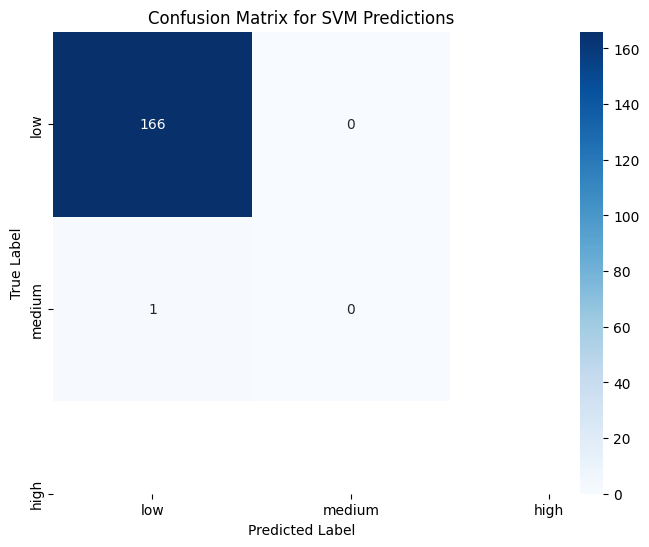

In [25]:
#svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df_filtered['value_category'] = pd.cut(df_filtered['value'], bins=3, labels=['low', 'medium', 'high'])
label_encoder = LabelEncoder()
df_filtered['region'] = label_encoder.fit_transform(df_filtered['region'])
df_filtered['powertrain'] = label_encoder.fit_transform(df_filtered['powertrain'])
df_filtered['value_category'] = label_encoder.fit_transform(df_filtered['value_category'])
# Splitting data
X = df_filtered[['region', 'powertrain', 'year']]
y = df_filtered['value_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(C=1.0, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
classification_report_svm = classification_report(y_test, y_pred)
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(f"\nAccuracy with SVM predictions: {accuracy_svm}")
print("\nClassification report with SVM predictions:")
print(classification_report_svm)
print("\nConfusion matrix with SVM predictions:")
print(conf_matrix_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.title('Confusion Matrix for SVM Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
